<a href="https://colab.research.google.com/github/prakruti-sid/Compensation-Data-Prediction-with-ML/blob/main/Employee_Compensation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Compensation - Project 2 💰


---


>Prakruthi Sidram

> Stack 2-3


### The Problem Statement 📜

Using the Radford Survey Aggregate `Employee Compensation Data` our goal is to help a HR personnel come up with a compensation figure for a new hire or a promoted employee.

Predict a good estimate of the Annual Pay based on 

- Location
- Job Title
- Experience
- Performance (percentage)
- Company Size
- Employee Count ( Small , Mid-Size or Large Company)

Target : `Total Pay - Average`

Modeling Category : Regression Modelling

Data from 10/15/2015

### Job Field Definations




#### Job Category Definations
Code | Job Category |
-----| ------------- |
E | Executive
P | Professional
S | Support
M | Management




####  Job Function Definations

Job Fn Abbrviation | Job Function | Description |
-----------------|-----------------|-------------|
AE | Aeronautical Engineering | 
FA | Finance Accounting & Legal |
GM | General Management |
HR | Human Resources |
IT | Information Technology | Technology covers activities requiring an engineering, life sciences, or computer science background that is applied to problem solution,using information systems, data management, or communications vehicles/platforms.
LS | Life Sciences |Life Sciences covers activities related to scientific research and development of products, such as pharmaceuticals, biologics, therapeutics, diagnostics, medical devices, animal health, etc.
MF | MAnufacturing | Core roles would include engineering, production, supply chain, skill trades
MK | Marketing
OP | Operations, Production & Supply Chain
PD | Product Design
PS | Professional Services , Outsourcing & Consulting
SS | Service & Support

#### New Job Function Categories 
Reference : [Radford Global Compensation Database Guide](https://radfordnetwork.aon.com/getmedia/8AC96BCF-9BAB-405C-B656-01F14EE2AE5C/Radford_Global_Compensation_Database_Input-Output-Guide)


Code | Job Function | Defination 
-----| -------------| ----------|
EXM | `Executive & Senior Management` |  `Firm-wide, function, area, or focus area leadership. `
INF | `Infrastructure` | Activities related to enabling functions that drive business results. Core roles include
 | |  `communications`, `compliance`, `corporate` and `business administration`, `finance`, `human resources` , `legal`,
  | |  `marketing`, `operations`, `risk management`, `technology`, and `treasury`.
SLS | `Sales` | Sales covers activities related to `new business and revenue generation`, 
| | `supporting customers in finding products, solutions, and services` that best meet their needs. 
TEC | `Technology` | Technology covers activities requiring an 
| | `engineering`, `life sciences`, or `computer science` background that is applied to problem solution, insight discovery, innovation, or product and/or service delivery using 
| |  `information systems`, `data management`, or `communications vehicles`/`platforms`.
LSC | `Life Sciences `| Life Sciences covers activities related to `scientific research and development of products`, 
| | such as `pharmaceuticals`, `biologics`, `therapeutics`, `diagnostics`, `medical devices`, `animal health`, etc.
RTL | `Retail & E - Comm` | Retail & e-Commerce covers activities related to `the sale of goods and services either in traditional stores`,
| | or `via electronic channels` including `internet sites`, `mobile applications` or `social media platforms`. 
| | May included `direct to consumer` or `business to business` transactions.
MNG | `Media & Gaming `|Media and Gaming covers activities related to the 
| | `acquisition`, `development`, `production`, `publication`, and `distribution of film`, `television`, `animation`,
| |  `radio`, `podcast`, `web-based video`, `streaming`, `broadcast`, `print media`, `electronic games`, and other forms of media.
MFG | `Manufacturing` | Manufacturing covers activities related to the `conversion of raw materials into goods including both consumer and industrial`.
| |  Core roles would include `engineering`, `production`, `supply chain`, `skill trades`.
ENE | `Energy` | Energy covers activities related to `the fossil fuels and renewable energy sectors, as well as in mining`. 
| | `Fossil fuels (coal, oil, & gas)` and `renewables (solar, wind, hydro, geothermal, and nuclear)` 
| | are `used to generate power for residential, commercial, industrial, and transportation` customers.


## Loading the Data 📥

In [72]:
# Libraries 

import pandas as pd
import numpy as np

#import plotting + diagram tools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display= 'diagram')

#import some necessary tools
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, make_column_transformer

from sklearn.model_selection import train_test_split, GridSearchCV, \
cross_val_score,cross_val_predict
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, \
StandardScaler
from sklearn.impute import SimpleImputer
#import evaluation metrics: accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, classification_report,confusion_matrix,plot_confusion_matrix, \
roc_auc_score, ConfusionMatrixDisplay,PrecisionRecallDisplay, RocCurveDisplay
from sklearn import metrics


#Importing the Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings(action='once')

In [73]:
# Employee Compensation Data for US

path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT5weLuL4_CWKcEuu_hpLH0YYtIfgP1GBZx7M3gb_vNpq4DsPm9jZXXD4Bfa5mAew/pub?output=xlsx'

In [74]:
# create dataframe
df_original = pd.read_excel(path)
df_original.head()

,Data Effective Date,Job Category,Job Level,Job Function,Job Code,Job Title,Company/Unit Revenue (USD) : Average,Company/Unit Revenue (USD) : 50th Percentile,Company/Unit Revenue (USD) : Co Count,Annual Base Salary - Average,...,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73
0,10/15/2015,E,0.0,GM,10.0,CEO - Corporate - Global,3.256616e+09,2.961680e+08,728.0,586446.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/15/2015,E,0.0,GM,20.0,President - Corporate - Global,3.891179e+09,2.754245e+08,102.0,460980.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/15/2015,E,0.0,GM,30.0,Chief Operating Officer - Corporate - Global,1.998261e+09,3.759340e+08,156.0,404056.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/15/2015,E,0.0,GM,50.0,Chair of the Board - Corporate - Global,5.718923e+09,1.398352e+09,25.0,585290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/15/2015,E,0.0,GM,80.0,CEO - Global Subsidiary,9.602987e+08,4.294200e+08,30.0,562132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Make a copy of the dataframe
df= df_original.copy()

In [76]:
# Dropping Unamed Columns

df.drop(df.iloc[:, 52:74],inplace=True,axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3429 entries, 0 to 3428
Data columns (total 52 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Data Effective Date                                     2890 non-null   object 
 1   Job Category                                            2890 non-null   object 
 2   Job Level                                               2890 non-null   float64
 3   Job Function                                            2890 non-null   object 
 4   Job Code                                                2890 non-null   object 
 5   Job Title                                               2890 non-null   object 
 6   Company/Unit Revenue (USD) : Average                    2890 non-null   float64
 7   Company/Unit Revenue (USD) : 50th Percentile            2890 non-null   float64
 8   Company/Unit Revenue (USD) : Co Count 

## Preprocessing Data 🗒

#### Duplicates & Missing Values 🍎 🍎 🔎

In [77]:
duplicates = df[df.duplicated()]
duplicates

,Data Effective Date,Job Category,Job Level,Job Function,Job Code,Job Title,Company/Unit Revenue (USD) : Average,Company/Unit Revenue (USD) : 50th Percentile,Company/Unit Revenue (USD) : Co Count,Annual Base Salary - Average,...,Total Pay - Incl Car - Emp Count,Total Pay - Incl Car - Co Count,New-Hire - Restricted/Performance - Average,New-Hire - Restricted/Performance - 50th percentile,New-Hire - Restricted/Performance - Emp Count,New-Hire - Restricted/Performance - Co Count,Ongoing Restricted/Performance Grants- Average,Ongoing Restricted/Performance Grants- 50th Percentile,Ongoing Restricted/Performance Grants- Emp Count,Ongoing Restricted/Performance Grants- Co Count
2891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df.drop_duplicates(inplace=True)

In [79]:
df.duplicated().sum()

0

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2891 entries, 0 to 2890
Data columns (total 52 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Data Effective Date                                     2890 non-null   object 
 1   Job Category                                            2890 non-null   object 
 2   Job Level                                               2890 non-null   float64
 3   Job Function                                            2890 non-null   object 
 4   Job Code                                                2890 non-null   object 
 5   Job Title                                               2890 non-null   object 
 6   Company/Unit Revenue (USD) : Average                    2890 non-null   float64
 7   Company/Unit Revenue (USD) : 50th Percentile            2890 non-null   float64
 8   Company/Unit Revenue (USD) : Co Count 

In [81]:
df.dropna(inplace=True)

We are working with about 84% of our original dataset

In [82]:
df.shape[0]/df_original.shape[0]

0.8428113152522602

### Fixing Inconsistencies 🪛

In [83]:
# Inspect all the categorical cols for data entry inconsistencies
for col in df.select_dtypes(include='object').columns:
  display(df[col].value_counts())
  print('\n')

10/15/2015    2890
Name: Data Effective Date, dtype: int64

P    1273
M    1042
S     397
E     178
Name: Job Category, dtype: int64

PD    599
FA    453
OP    444
MK    331
IT    262
SS    212
PS    159
LS    157
HR    153
MF     65
GM     43
AE     12
Name: Job Function, dtype: int64

10.0      1
6512.0    1
6514.0    1
6521.0    1
6522.0    1
         ..
3664.0    1
3665.0    1
3672.0    1
3673.0    1
RS0054    1
Name: Job Code, Length: 2890, dtype: int64

CEO - Corporate - Global                            1
Web Site Administrator  2                           1
Web Site Administrator  4                           1
Web Technologist  1                                 1
Web Technologist  2                                 1
                                                   ..
Global Mobility Mgmt  4                             1
Global Mobility Mgmt  5                             1
Employee Communications Mgmt  2                     1
Employee Communications Mgmt  3                     1
Support - BPO/Non-BPO Customer Support Roll-Up 4    1
Name: Job Title, Length: 2890, dtype: int64

0.0            34
91.94/8.06      9
94.51/5.49      9
90.34/9.66      8
92.05/7.95      8
               ..
78.31/21.69     1
71.72/28.28     1
77.08/22.92     1
77.7/22.3       1
93.55/6.45      1
Name: Base/Target Incentive Mix : Average, Length: 1485, dtype: int64

Convert Base% to a float datatype

In [84]:
# Split the Base/Target Incentive Mix 
# The Base + Target = 100% So we'll split this column and keep only the Base %
df = df.rename(columns={'Base/Target Incentive Mix : Average': 'Base%'})

In [85]:
df['Base%'] = df['Base%'].str.slice(stop=2)

In [87]:
df['Base%'] = df['Base%'].astype('float')

In [ ]:
#df['Base%'].replace({'90/1':'90'}, inplace=True)

In [ ]:
#df['Base%'].replace({'66/3':'66'}, inplace=True)

In [88]:
df['Base%'].value_counts()

93.0    265
92.0    262
94.0    255
91.0    252
95.0    209
90.0    192
88.0    187
89.0    184
86.0    124
87.0    117
82.0     97
85.0     95
83.0     82
81.0     69
78.0     59
84.0     53
79.0     47
96.0     43
80.0     39
77.0     32
73.0     23
75.0     18
72.0     16
70.0     15
71.0     14
76.0     13
67.0     12
69.0     12
74.0     11
64.0      8
66.0      8
65.0      8
68.0      7
62.0      6
59.0      5
55.0      3
63.0      3
61.0      2
58.0      2
60.0      2
54.0      1
53.0      1
97.0      1
57.0      1
52.0      1
Name: Base%, dtype: int64

### Dropping Unnecessary Columns  ✏

Job Code = All unique values wont help the algo 

In [90]:
df.drop(columns = ['Job Code'], inplace = True)

Dropping all the 50 th percentile columns as it is redundant. 
  - We will use the Averages & can calculate max,min, 50th percentile as needed

In [91]:
df.drop(columns= ['Ongoing Restricted/Performance Grants- 50th Percentile','New-Hire - Restricted/Performance - 50th percentile','Total Pay - 50th percentile','Base Salary + Target Incent - 50th percentile','New-Hire Bonus Amt - 50th percentile','Company/Unit Revenue (USD) : 50th Percentile'], inplace = True)

In [92]:
df.drop(columns = ['Total Allow Amt -  50th percentile'], inplace = True)

Drop the Date Effective column which was only one value - 10/15/15

In [93]:
df.drop('Data Effective Date', axis=1, inplace=True)

### Cleaning Up Columns

Replacing values based on the Data Definations

In [94]:
df['Job Category'].replace({'P': 'Professional', 'E': 'Executive', 'S': 'Support', 'M': 'Management'}, inplace=True)

In [95]:
df['Job Function'].replace({'PD' : 'Product Design',
                            'FA' : 'Finance Accounting Legal',
                            'OP' : 'Operations',
                            'MK' : 'Media & Marketing',
                            'IT' : 'Technology',
                            'SS' : 'Service & Support',
                            'PS' : 'Professional Services',
                            'LS' : 'Life Sciences',
                            'HR' : 'Human Resources',
                            'MF' : 'Manufacturing',
                            'GM' : 'General Mgmt',
                            'AE' : 'Aeronautical Engineering'}, inplace = True)

In [97]:
df.columns = ['Job Category' , 'Job Level','Job Function','Job Title','Company Revenue - Avg',
'Company Revenue - Co_Count',
'Annual Base - Avg',
'Annual Base - Emp_Count',
'Annual Base - Co_Count',
'%Emp_Allow_eligible - Avg',
'%Emp_Allow - Emp_Count',
'%Emp_Allow - Co Count',
'Total_Allow - Avg',
'Total_Allow - Emp_Count',
'Total_Allow - Co_Count',
'Fixed Comp - Avg',
'%Emp_Incent_elig - Avg',
'%Emp_Incent_elig - Emp_Count',
'%Emp_Incent_elig - Co_Count',
'Incent% - Avg',
'Base% - Avg',
'Base% - Emp_Count',
'Base% - Co_Count',
'%Emp Recd New-Hire Bonus - Avg',
'%Emp Recd New-Hire Bonus - Emp_Count',
'%Emp Recd New-Hire Bonus - Co_Count',
'New-Hire Bonus Amt - Avg',
'New-Hire Bonus Amt - Emp Count',
'New-Hire Bonus Amt - Co_Count',
'Base Salary + Target Incent - Avg',
'Base Salary + Target Incent - Emp_Count',
'Base Salary + Target Incent - Co_Count',
'Total Pay - Avg',
'Total Pay - Emp_Count',
'Total Pay - Co_Count',
'Total Pay - Incl Car - Emp_Count',
'Total Pay - Incl Car - Co_Count',
'New-Hire - Performance - Avg',
'New-Hire - Performance -  Emp_Count',
'New-Hire - Performance - Co_Count',
'Ongoing Performance Grants- Avg',
'Ongoing Performance Grants- Emp_Count',
'Ongoing Performance Grants- Co_Count']

In [98]:
for col in df.columns:
  print(col)

Job Category
Job Level
Job Function
Job Title
Company Revenue - Avg
Company Revenue - Co_Count
Annual Base - Avg
Annual Base - Emp_Count
Annual Base - Co_Count
%Emp_Allow_eligible - Avg
%Emp_Allow - Emp_Count
%Emp_Allow - Co Count
Total_Allow - Avg
Total_Allow - Emp_Count
Total_Allow - Co_Count
Fixed Comp - Avg
%Emp_Incent_elig - Avg
%Emp_Incent_elig - Emp_Count
%Emp_Incent_elig - Co_Count
Incent% - Avg
Base% - Avg
Base% - Emp_Count
Base% - Co_Count
%Emp Recd New-Hire Bonus - Avg
%Emp Recd New-Hire Bonus - Emp_Count
%Emp Recd New-Hire Bonus - Co_Count
New-Hire Bonus Amt - Avg
New-Hire Bonus Amt - Emp Count
New-Hire Bonus Amt - Co_Count
Base Salary + Target Incent - Avg
Base Salary + Target Incent - Emp_Count
Base Salary + Target Incent - Co_Count
Total Pay - Avg
Total Pay - Emp_Count
Total Pay - Co_Count
Total Pay - Incl Car - Emp_Count
Total Pay - Incl Car - Co_Count
New-Hire - Performance - Avg
New-Hire - Performance -  Emp_Count
New-Hire - Performance - Co_Count
Ongoing Performance 

## Exploratory Data Analysis 📊

Univariate Plots

Text(0.5, 1.0, ' Job Category Analysis')

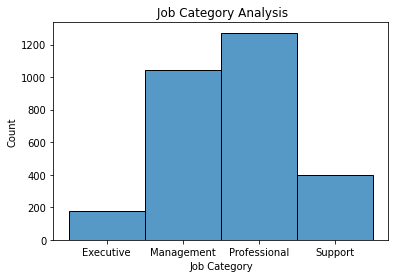

In [101]:
sns.histplot(x='Job Category',
             data = df,
             kde = False)
plt.title(' Job Category Analysis')

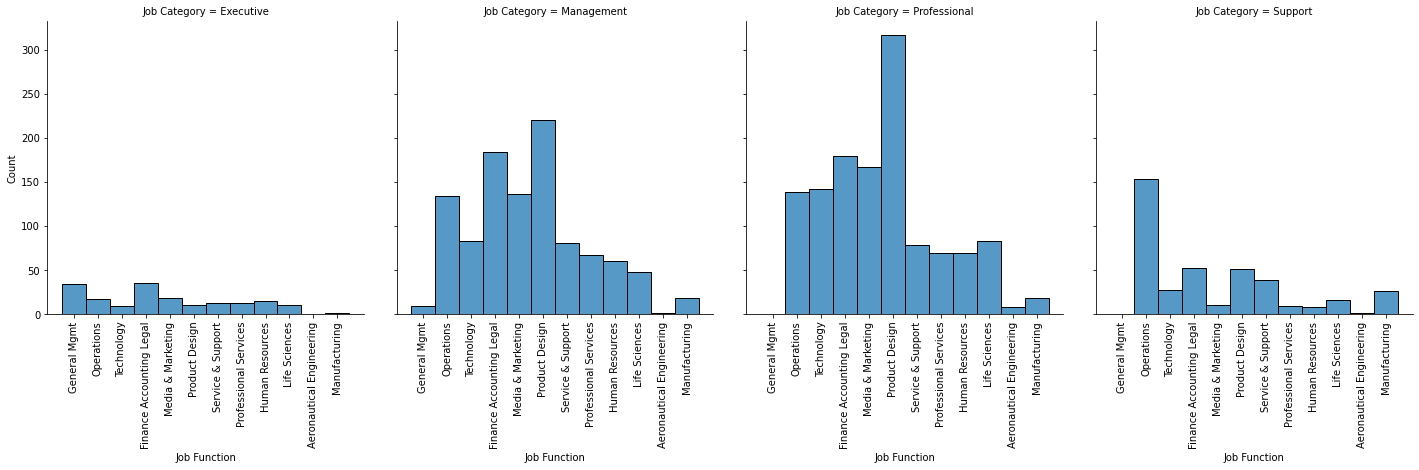

In [116]:
#p_category = df['Job Category'] == 'Professional'

chart = sns.displot(data= df,
             col = 'Job Category',
             col_wrap = 4,
             x = 'Job Function')
chart.set_xticklabels(rotation=90)
